<a href="https://colab.research.google.com/github/andygoosh/OneTwoTrip-Contest/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn
import sklearn

    100% |████████████████████████████████| 7.0MB 2.0MB/s 
mlcomp 19.9.5 has requirement catalyst==19.9.5, but you'll have catalyst 19.10.1 which is incompatible.
  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2


In [9]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

#%load_ext tensorboard

%pylab inline
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (6,6)

import random as rn
import pandas as pd
import xarray
import requests
import datetime
import numpy as np
from datetime import timedelta
from tqdm import tqdm_notebook as tqdm
import sklearn as skl
import seaborn as sns
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

#import tensorflow as tf
#import tensorflow.keras as keras

#print(tf.__version__)
#print(keras.__version__)
#print(sklearn.__version__)

assert ('0.22' == sklearn.__version__)

#from keras import layers
#from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import sklearn.ensemble
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, RandomizedSearchCV, cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

import warnings
#logger = tf.get_logger()
#logger.setLevel(logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.6f}'.format

RS = 77
rn.seed(RS)
#tf.random.set_seed(RS)
np.random.seed(RS)
np.random.RandomState(RS)

Populating the interactive namespace from numpy and matplotlib


In [10]:
df_train = pd.read_csv('https://boosters.pro/api/ch/files/pub/onetwotrip_challenge_train.csv', index_col='orderid', dtype={'field1': np.float32, 'field14': np.float32})
df_test = pd.read_csv('https://boosters.pro/api/ch/files/pub/onetwotrip_challenge_test.csv', index_col='orderid', dtype={'field1': np.float32, 'field14': np.float32})

df_train

,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
orderid,,,,,,,,,,,,,,,,,,,,,
0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,1,...,1,0,1,1,0,1,0,0,0,0
1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,1,...,1,0,1,0,0,0,0,0,0,0
2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,1,...,1,0,1,1,0,0,0,0,0,0
3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,1,...,1,0,1,1,0,0,0,0,0,0
4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704080,8,11,1,1,0,1,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,1,...,1,0,1,0,0,0,0,0,0,0
196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,1,...,1,1,1,1,0,0,0,0,0,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196056 entries, 0 to 196055
Data columns (total 42 columns):
userid              196056 non-null object
field0              196056 non-null int64
field1              196056 non-null float32
field2              196056 non-null int64
field3              196056 non-null int64
field4              196056 non-null int64
field5              196056 non-null int64
field6              196056 non-null int64
field7              196056 non-null int64
field8              196056 non-null int64
field9              196056 non-null int64
field10             196056 non-null int64
field11             196056 non-null int64
field12             196056 non-null int64
field13             196056 non-null int64
field14             196056 non-null float32
field15             196056 non-null int64
field16             196056 non-null int64
field17             196056 non-null int64
field18             196056 non-null int64
field19             196056 non-null int64
fi

In [12]:
def add_polynomial_inner( X, poly ):
  X = pd.DataFrame(poly.transform(X), index=X.index, columns = poly.get_feature_names(X.columns))
  return X
    
def add_polynomial(X_train, X_cv=None, degree=2):
  poly = sklearn.preprocessing.PolynomialFeatures(degree)
  poly.fit(X)
  
  X_train = add_polynomial_inner(X_train, poly)
  if X_cv is not None:
      X_cv = add_polynomial_inner(X_cv, poly)

  #poly_corrs = poly_features.corrwith(y).sort_values(ascending=False)
  #poly_corrs = poly_features.corrwith(y).nlargest(20)

  return X_train, X_cv, poly

In [13]:
def add_neughbors_inner( X, neigh ):
    X = X.copy()
    dists, _ = neigh.kneighbors(X, return_distance=True)
    X['K-mean'] = dists.mean(axis=1).reshape(-1, 1)
    X['K-max'] = dists.max(axis=1).reshape(-1, 1)
    return X

def add_neighbors(X_train, X_cv=None, n_neighbors=5):
  neigh = skl.neighbors.NearestNeighbors(n_neighbors=n_neighbors, n_jobs=-1)
  neigh.fit(X_train)

  X_train = add_neughbors_inner(X_train, neigh)
  if X_cv is not None:
      X_cv = add_neughbors_inner(X_cv, neigh)

  return X_train, X_cv, neigh

In [14]:
def vectorize( X, cols ):

  for col in cols:
    n_bins = len(X[col].unique())
    est = skl.preprocessing.KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='uniform')
    m = pd.DataFrame(est.fit_transform(X[[col]]).astype(np.float32), index=X.index, columns=['%s_%d' % (col, i) for i in range(n_bins)])

    X = X.join(m)
  X.drop(*cols, axis=1, inplace=True)

  return X

In [17]:
def prepare_data( data, undersample=0 ):

  X = data.copy()
  y = []

  if undersample > 0:
    # Separate majority and minority classes
    df_majority = X[X['goal1']==0]
    df_minority = X[X['goal1']==1]
    
    n_samples = math.floor( X['goal1'].sum() * undersample )

    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=n_samples,     # to match minority class
                                    random_state=RS) # reproducible results
    
    # Combine minority class with downsampled majority class
    X = pd.concat([df_majority_downsampled, df_minority])# Separate majority and minority classes

  if  'goal1' in X.columns:
    y = X[['goal1']].astype(np.float32)

  FTS = list(filter(lambda x: 'field' in x, data.columns))
  X = X[FTS].astype(np.float32)
  '''
  # drop overfitting fts
  #X.drop(['field16'], axis=1, inplace=True)

  # add polimonial
  X['field7_field16'] = X['field7'] * X['field16']
  X['field16_field17'] = X['field16'] * X['field17']
  #X['field16_field25'] = X['field16'] * X['field25']
  X['field12_field16'] = X['field12'] * X['field16']
  X['field7_field12'] = X['field7'] * X['field12']
  X['field12_field25'] = X['field12'] * X['field25']

  # drop unimportant or negatively impacting
  X.drop(['field0', 'field29', 'field28'], axis=1, inplace=True)

  X = vectorize(X, ['field21']) #, 'field5', 'field7', 'field8', 'field9', 'field10', 'field18', 'field19', 'field20', 'field27'])
  X.drop(['field21_1'], axis=1, inplace=True)

  #X.drop(['field5_1', 'field7_1', 'field8_1', 'field9_2', 'field9_3', 'field9_4', 'field10_1', 'field19_0', 'field19_7', 'field19_8', 'field27_3'], axis=1, inplace=True)
  '''

  return X, y

(13023, 30)


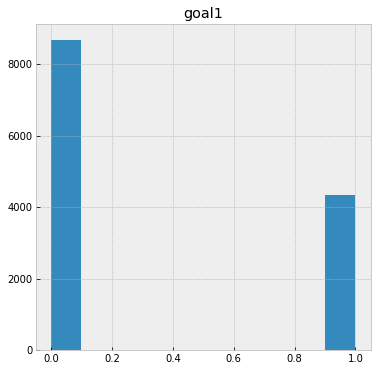

In [18]:
X, y = prepare_data( df_train, undersample=2 )
y.hist()
np.unique(y, return_counts=True)
print(X.shape)

In [19]:
def fit_estimate( X, y, model_generator, n_folds = 5, n_neighbors=0, degree=0):

  scores = []
  models = []
  neighbs = []
  polies = []

  folds = list(skl.model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=RS).split(X, y))
  for j, (train_idx, val_idx) in enumerate(folds):

    X_train, X_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_cv = y.iloc[train_idx], y.iloc[val_idx]

    if degree > 1:
      X_train, X_cv, poly = add_polynomial(X_train, X_cv, degree)
      polies.append(poly)
    
    if n_neighbors > 0:
      X_train, X_cv, neigh = add_neighbors(X_train, X_cv, n_neighbors)
      neighbs.append(neigh)

    model = model_generator()
    model.fit(X_train, y_train.values.ravel(), 
              #eval_set = [(X_cv, y_cv.values.ravel())],
              #verbose=0,
              #early_stopping_rounds = 100,
              )

    skl.metrics.plot_confusion_matrix(model, X_cv, y_cv)
    skl.metrics.plot_roc_curve(model, X_cv, y_cv)

    y_pred_cv = model.predict_proba(X_cv)
    # score = skl.metrics.roc_auc_score(keras.utils.to_categorical(y_cv), y_pred_cv) # works for multiclass
    score = skl.metrics.roc_auc_score(y_cv, y_pred_cv[:, 1]) # better one for binary
    scores.append(score)
    models.append(model)
    print('[{:}/{:}>{:.5f}]'.format(j+1,n_folds, score) , end='')


  print('{:} cv: {:.4f} ± {:.4f}.'.format(type(model).__name__, np.mean(scores), np.std(scores)))
  return scores, models, neighbs, polies

In [21]:
#model.get_params()

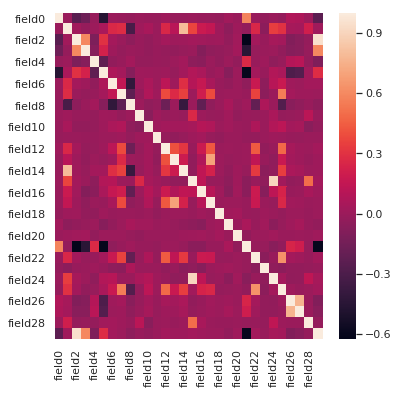

In [22]:
import seaborn as sns; sns.set()
ax = sns.heatmap(X.corr())

In [23]:
def estimate(X, y, model):
  X_train, X_cv, y_train, y_cv = train_test_split(X, y, random_state=RS, shuffle=True)

  model.fit(X_train, y_train.values.ravel())

  y_pred_train = model.predict_proba(X_train)
  roc_train = skl.metrics.roc_auc_score(y_train, y_pred_train[:, 1]) 

  y_pred_cv = model.predict_proba(X_cv)
  roc_cv = skl.metrics.roc_auc_score(y_cv, y_pred_cv[:, 1])

  skl.metrics.plot_confusion_matrix(model, X_cv, y_cv)
  skl.metrics.plot_roc_curve(model, X_cv, y_cv)

  print('#{}: {:.5f} vs {:.5f}'.format(type(model).__name__, roc_train, roc_cv))
  return model

#VotingClassifier: 0.85534 vs 0.67877


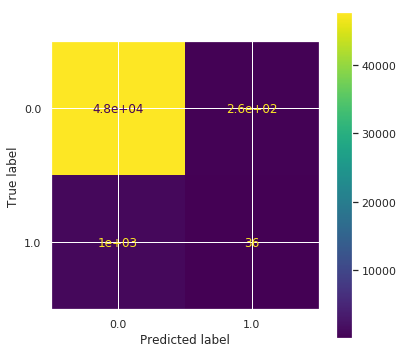

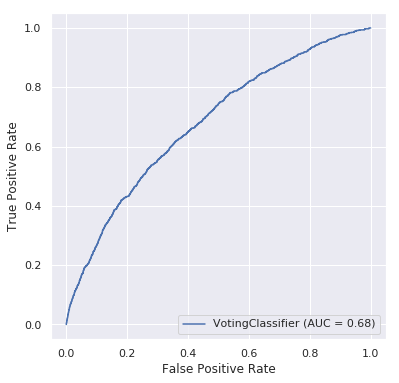

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

X, y = prepare_data( df_train, undersample=0 )

xgb = XGBClassifier(random_state = RS)
abc = skl.ensemble.AdaBoostClassifier(random_state = RS)
gbc = skl.ensemble.GradientBoostingClassifier(random_state = RS)
gnb = GaussianNB()
rfc = skl.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=-1)
clfbag = skl.ensemble.BaggingClassifier(clf, n_estimators=5)
svc = SVC(random_state = RS, probability=True)
lgbm = LGBMClassifier(random_state = RS)
lgbm_b = LGBMClassifier(random_state = RS, class_weight='balanced' )
clf_sigmoid = CalibratedClassifierCV(xgb, cv=3, method='sigmoid')
vc = skl.ensemble.VotingClassifier(estimators=[('xgb', xgb), ('lgbm', lgbm), ('gbc', gbc)], voting='soft')
vc1 = skl.ensemble.VotingClassifier(estimators=[('lgbm', lgbm), ('lgbm_b', lgbm_b)], weights=[2, 3], voting='soft')


model = estimate(X, y, vc1);

#RandomForestClassifier: 0.99987 vs 0.58307 - unbalanced
#RandomForestClassifier: 0.99881 vs 0.62169 - balanced

#AdaBoostClassifier: 0.68902 vs 0.67483

#CalibratedClassifierCV: 0.71289 vs 0.69033 for XGBClassifier

#GradientBoostingClassifier: 0.70029 vs 0.68350
#GradientBoostingClassifier: 0.75496 vs 0.66729 - balanced

#CalibratedClassifierCV: 0.70296 vs 0.68644 for GradientBoostingClassifier
#CalibratedClassifierCV: 0.74907 vs 0.66534 balanced

#VotingClassifier: 0.99981 vs 0.67803

#GaussianNB: 0.63033 vs 0.63758
#CalibratedClassifierCV: 0.63127 vs 0.64139 for GaussianNB

#LGBMClassifier: 0.84498 vs 0.68050 - unbalanced
#LGBMClassifier: 0.92232 vs 0.65621 - balanced

#XGBClassifier: 0.71139 vs 0.68740 - unbalanced
#XGBClassifier: 0.74734 vs 0.66816 - balanced

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X, y = prepare_data( df_train )

xgb = XGBClassifier(random_state = RS)
lgbm = LGBMClassifier(random_state = RS) #, class_weight='balanced' )

sfs1 = SFS(xgb, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3,
           n_jobs=-1)

sfs1 = sfs1.fit(X, y.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   13.6s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.0s finished

[2019-12-31 11:17:56] Features: 1/30 -- score: 0.6239269982955472[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  29 | elapsed:    9.1s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   15.2s finished

[2019-12-31 11:18:11] Features: 2/30 -- score: 0.6679184726248204[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  28 | elapsed:   12.8s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   20.2s finished

[2019-12-31 11:18:31] Features: 3/30 -- score: 0.6734286638801574[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of

In [26]:
sfs1.k_score_

0.6850904957635063

In [27]:
sfs1.k_feature_names_

('field2',
 'field3',
 'field6',
 'field7',
 'field8',
 'field12',
 'field13',
 'field14',
 'field16',
 'field18',
 'field19',
 'field21',
 'field22',
 'field27')

[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:34:14] /work

'\npoly = polies[np.argmax(scores)]\nX = add_polynomial_inner(X, poly)\n'

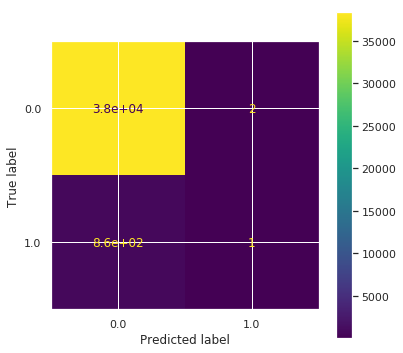

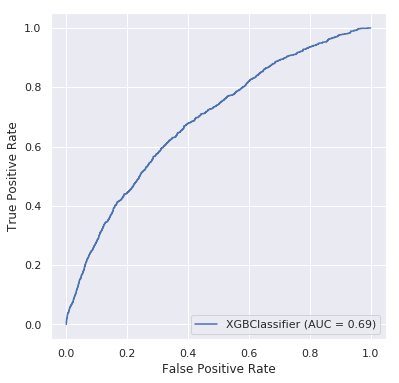

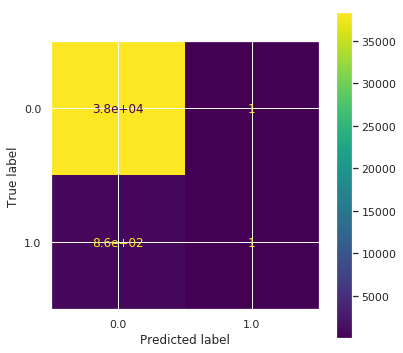

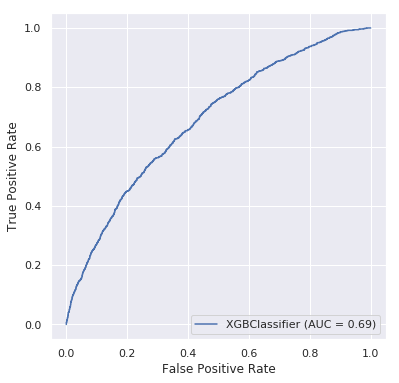

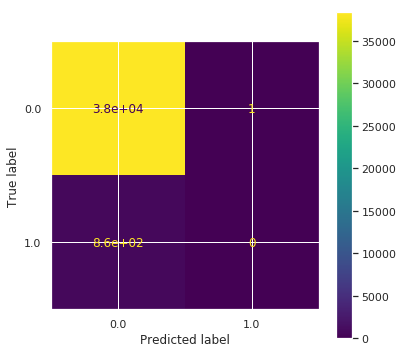

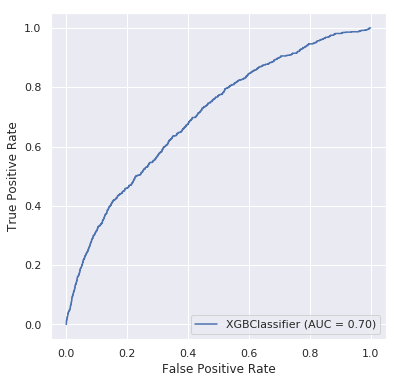

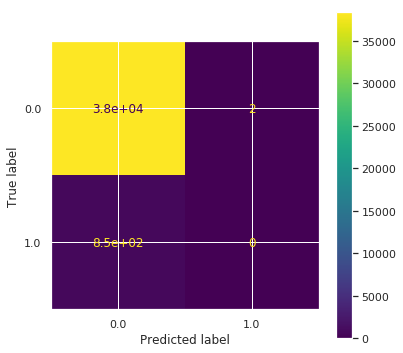

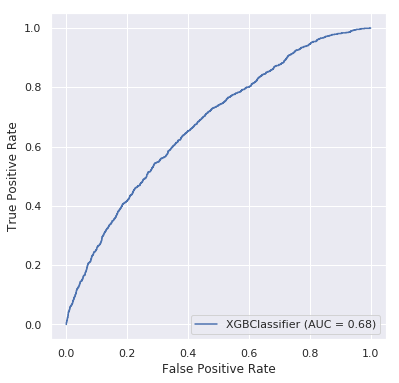

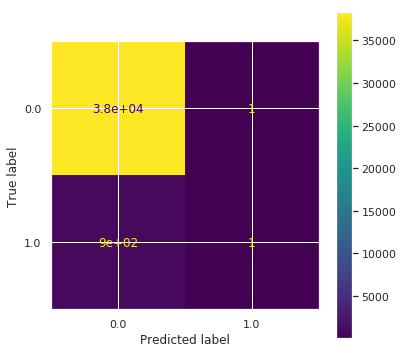

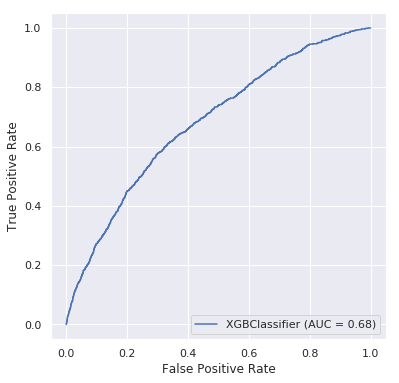

In [28]:
X, y = prepare_data( df_train )

estimators = 157
params = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 0.6,
 'missing': None,
 'n_estimators': estimators,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': RS,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.9,
 'verbosity': 1,
 }

def_params = {
    'random_state': RS,
    'n_estimators': estimators,
    'n_jobs': -1
}

#class_weight='balanced',

scores, models, neighbs, polies = fit_estimate(X, y, lambda: XGBClassifier(**params), n_folds=5, degree=0, n_neighbors=0)
#scores, models, neighbs, polies = fit_estimate(X, y, lambda: LGBMClassifier(random_state = RS, n_jobs=-1 ), n_folds=5, degree=0, n_neighbors=0)
model = models[np.argmax(scores)]
'''
neigh = neighbs[np.argmax(scores)]
X = add_neughbors_inner(X, neigh)
'''
'''
poly = polies[np.argmax(scores)]
X = add_polynomial_inner(X, poly)
'''
#[1/5][2/5][3/5][4/5][5/5]XGBClassifier CV: 0.6876 ± 0.0086. params fine tuning, -f0
#[1/5][2/5][3/5][4/5][5/5]XGBClassifier CV: 0.6881 ± 0.0090. params fine tuning, -f0, f28 +5 neigh
#[1/5][2/5][3/5][4/5][5/5]XGBClassifier cv: 0.6885 ± 0.0078. polinomial, 0 neigh
#[1/5][2/5][3/5][4/5][5/5]XGBClassifier cv: 0.6895 ± 0.0111. polimonial, 5 neigh
#[1/5][2/5][3/5][4/5][5/5]XGBClassifier cv: 0.6895 ± 0.0092. -1/2 field21, 0 neigh

In [29]:
def plot_history(history, metric_names):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  old_rcparam = plt.rcParams["figure.figsize"]
  plt.rcParams["figure.figsize"] = (18,6)

  num_plots = len(metric_names)

  for i in range(num_plots):
    plt.subplot(1,num_plots,i+1)
    plt.xlabel('Epoch')
    plt.ylabel(metric_names[i])
    plt.plot(hist['epoch'], hist[metric_names[i]],
            label='Train %s' % metric_names[i])
    plt.plot(hist['epoch'], hist['val_%s' % metric_names[i]],
            label = 'Val %s' % metric_names[i])
    plt.legend()
  
  plt.show()

  plt.rcParams["figure.figsize"] = old_rcparam

Index(['field12', 'field16', 'field6', 'field14', 'field1', 'field22',
       'field0', 'field11', 'field13', 'field23', 'field25', 'field2',
       'field3', 'field17', 'field18', 'field4', 'field19', 'field26',
       'field10', 'field20'],
      dtype='object')


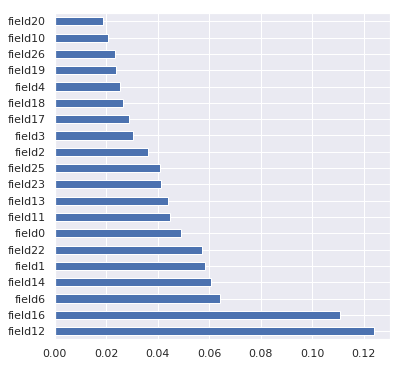

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
print(feat_importances.nlargest(20).index)

Index(['field29', 'field8', 'field5', 'field9', 'field21', 'field7', 'field24',
       'field15', 'field27', 'field28', 'field20', 'field10', 'field26',
       'field19', 'field4', 'field18', 'field17', 'field3', 'field2',
       'field25'],
      dtype='object')


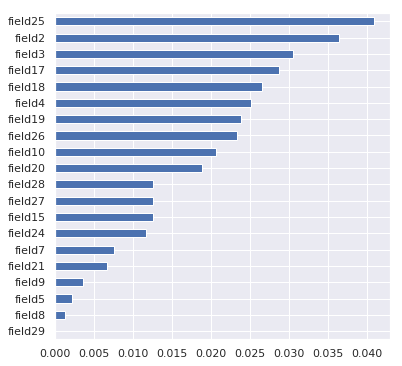

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(20).plot(kind='barh')
print(feat_importances.nsmallest(20).index)

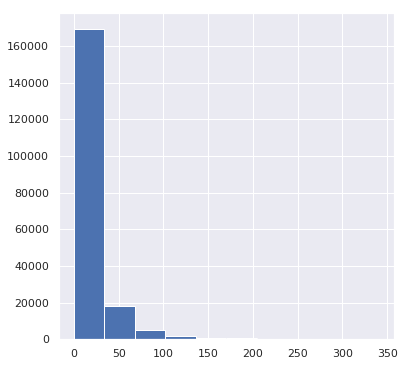

In [35]:
X['field16'].hist()

In [36]:
X, y = prepare_data( df_train )

params = {'base_score': 0.5,
 'booster': 'gbtree',
 'class_weight': 'balanced',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 0.5,
 'missing': None,
 'n_estimators': 340,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 77,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

parameters_xgb = { 
    'n_estimators': [158, 159], #_100
    }

clf = XGBClassifier(random_state=RS)

GS = GridSearchCV(clf, 
                  parameters_xgb, 
                  cv=KFold( n_splits = 5, shuffle=True, random_state=RS),
                  verbose=10, 
                  n_jobs=-1,
                  scoring='roc_auc')
GS.fit(X, y)
print( GS.best_params_ )
print( GS.best_score_ )

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   20.0s remaining:   46.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   20.4s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   24.3s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.5s finished
/home/renat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/renat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'n_estimators': 158}
0.6864149180228434


In [37]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt   
import sklearn.ensemble

X, y = prepare_data(df_train)

clf = XGBClassifier(random_state=RS)

params = {'base_score': sp_randFloat(),
 'colsample_bylevel': sp_randFloat(),
 'colsample_bynode': sp_randFloat(),
 'colsample_bytree': sp_randFloat(),
 'gamma': sp_randFloat(),
 'learning_rate': sp_randFloat(0, 1),
 'max_delta_step': sp_randFloat(),
 'max_depth': sp_randInt(2, 10),
 'min_child_weight': sp_randFloat(),
 'n_estimators': sp_randInt(10, 1000),
 'n_jobs': [-1],
 'random_state': [RS],
 'reg_alpha': sp_randFloat(),
 'reg_lambda': sp_randFloat(),
 'scale_pos_weight': sp_randFloat(),
 'subsample': sp_randFloat(),
 'seed': sp_randInt(2, 10),
 }

rs = RandomizedSearchCV(clf, 
                        param_distributions=params, 
                        cv=2, 
                        verbose=1, 
                        n_iter=30, 
                        scoring='roc_auc',
                        n_jobs=-1)
rs.fit(X, y)
print( rs.best_params_ )
print( rs.best_score_ )
#{'base_score': 0.6644410991187997, 'colsample_bylevel': 0.6059678409651669, 'colsample_bynode': 0.17400982470452497, 'colsample_bytree': 0.6647085043362304, 'gamma': 0.01605629494332772, 'learning_rate': 0.09143541671068811, 'max_delta_step': 0.9405103527865268, 'max_depth': 9, 'min_child_weight': 0.23677205024963843, 'n_estimators': 116, 'n_jobs': -1, 'random_state': 77, 'reg_alpha': 0.983017349002685, 'reg_lambda': 0.7338821091963531, 'scale_pos_weight': 0.1314841497459578, 'seed': 7, 'subsample': 0.610130474493417}
#{'base_score': 0.0006763272285300603, 'colsample_bylevel': 0.9131040645300111, 'colsample_bynode': 0.6217260824900458, 'colsample_bytree': 0.498105896239323, 'gamma': 0.7503808382193502, 'learning_rate': 0.5233450726284934, 'max_delta_step': 0.2189376337324893, 'max_depth': 8, 'min_child_weight': 0.9084424403935606, 'n_estimators': 177, 'n_jobs': -1, 'random_state': 77, 'reg_alpha': 0.8494551200058984, 'reg_lambda': 0.8606428319131949, 'scale_pos_weight': 0.11685893701548733, 'seed': 6, 'subsample': 0.6828797818811899}
0.6772912978785195

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished
/home/renat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/renat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'base_score': 0.43190831941177144, 'colsample_bylevel': 0.36417241344301665, 'colsample_bynode': 0.1519715256925609, 'colsample_bytree': 0.5467103397159158, 'gamma': 0.44329303760233363, 'learning_rate': 0.03606131000291102, 'max_delta_step': 0.8228931912295053, 'max_depth': 7, 'min_child_weight': 0.008730397887417807, 'n_estimators': 492, 'n_jobs': -1, 'random_state': 77, 'reg_alpha': 0.6443697547109174, 'reg_lambda': 0.10754107880259256, 'scale_pos_weight': 0.3532450981171027, 'seed': 4, 'subsample': 0.6735654581007056}
0.6781957045343354


0.6772912978785195

## Submit the result

In [38]:
X_test, _ = prepare_data( df_test )

#X_test = add_neughbors_inner(X_test, neigh)

proba = model.predict_proba(X_test)

pd.DataFrame(proba[:, 1], columns=['proba'], index=X_test.index).to_csv('sub1.csv')
pd.DataFrame(model.predict(X_test), columns=['proba'], index=X_test.index).sum()

proba   7.000000
dtype: float32

In [94]:
!zip sub1.csv.zip sub1.csv

  adding: sub1.csv (deflated 57%)


In [39]:
!pip3 install -q eli5
import eli5
from eli5.sklearn import PermutationImportance

/bin/sh: 1: pip3: not found


/home/renat/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/renat/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [40]:
!pip3 install -q catboost
from catboost import CatBoostClassifier

/bin/sh: 1: pip3: not found


In [41]:
!pip install -q shap

In [42]:
!pip install -q scikit-plot
